In [60]:
!pip install AutoViz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stat
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV

In [61]:
df = pd.read_csv('StudentsPerformance.csv')
df

gender race/ethnicity parental level of education     lunch      \
0    female     group B          bachelor's degree          standard   
1    female     group C               some college          standard   
2    female     group B            master's degree          standard   
3      male     group A         associate's degree      free/reduced   
4      male     group C               some college          standard   
..      ...            ...                         ...           ...   
995  female     group E            master's degree          standard   
996    male     group C                high school      free/reduced   
997  female     group C                high school      free/reduced   
998  female     group D               some college          standard   
999  female     group D               some college      free/reduced   

    test preparation course  math score  reading score  writing score  
0                none            72           72             74        
1           completed            69           90             88        
2                none            90           95             93        
3                none            47           57             44        
4                none            76           78             75        
..                      ...         ...            ...            ...  
995         completed            88           99             95        
996              none            62           55             55        
997         completed            59           71             65        
998         completed            68           78             77        
999              none            77           86             86        

[1000 rows x 8 columns]

In [62]:
df.describe()

math score  reading score  writing score
count  1000.00000   1000.000000    1000.000000 
mean     66.08900     69.169000      68.054000 
std      15.16308     14.600192      15.195657 
min       0.00000     17.000000      10.000000 
25%      57.00000     59.000000      57.750000 
50%      66.00000     70.000000      69.000000 
75%      77.00000     79.000000      79.000000 
max     100.00000    100.000000     100.000000

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
temp_df = pd.DataFrame(df)

In [65]:
temp_df = temp_df.rename(columns={'parental level of education' : 'parents'})
temp_df = temp_df.drop(['lunch'],axis=1)
temp_df.head()

gender race/ethnicity       parents       test preparation course  \
0  female     group B      bachelor's degree              none         
1  female     group C           some college         completed         
2  female     group B        master's degree              none         
3    male     group A     associate's degree              none         
4    male     group C           some college              none         

   math score  reading score  writing score  
0      72           72             74        
1      69           90             88        
2      90           95             93        
3      47           57             44        
4      76           78             75

In [66]:
average = temp_df[["math score", "reading score", "writing score"]].mean(axis=1).astype('int32')
average.head()

0    72
1    82
2    92
3    49
4    76
dtype: int32

In [67]:
temp_df['average'] = average
temp_df

gender race/ethnicity       parents       test preparation course  \
0    female     group B      bachelor's degree              none         
1    female     group C           some college         completed         
2    female     group B        master's degree              none         
3      male     group A     associate's degree              none         
4      male     group C           some college              none         
..      ...            ...                 ...                     ...   
995  female     group E        master's degree         completed         
996    male     group C            high school              none         
997  female     group C            high school         completed         
998  female     group D           some college         completed         
999  female     group D           some college              none         

     math score  reading score  writing score  average  
0        72           72             74          72     
1        69           90             88          82     
2        90           95             93          92     
3        47           57             44          49     
4        76           78             75          76     
..          ...            ...            ...      ...  
995      88           99             95          94     
996      62           55             55          57     
997      59           71             65          65     
998      68           78             77          74     
999      77           86             86          83     

[1000 rows x 8 columns]

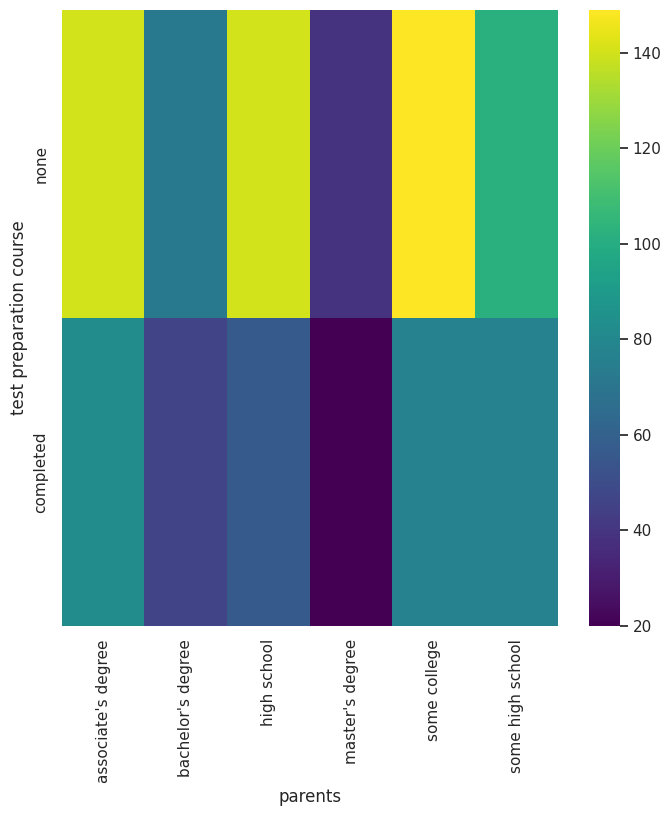

In [68]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['test preparation course'].value_counts()
    for x_label, grp in temp_df.groupby('parents')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('parents')
_ = plt.ylabel('test preparation course')

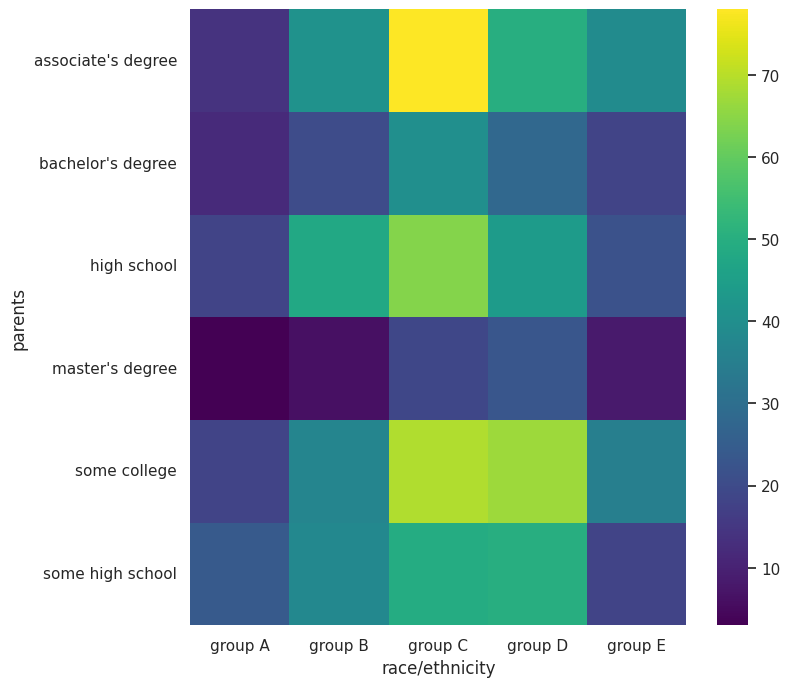

In [69]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['parents'].value_counts()
    for x_label, grp in temp_df.groupby('race/ethnicity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race/ethnicity')
_ = plt.ylabel('parents')

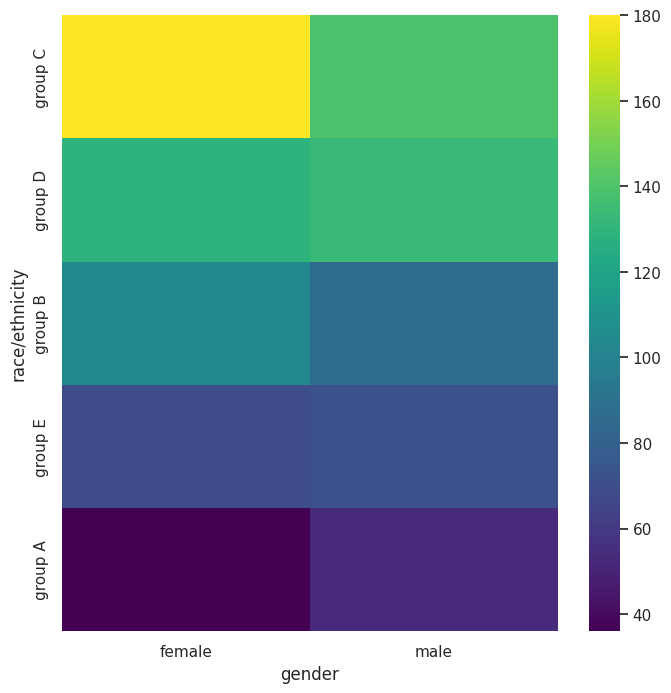

In [70]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race/ethnicity'].value_counts()
    for x_label, grp in temp_df.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('race/ethnicity')

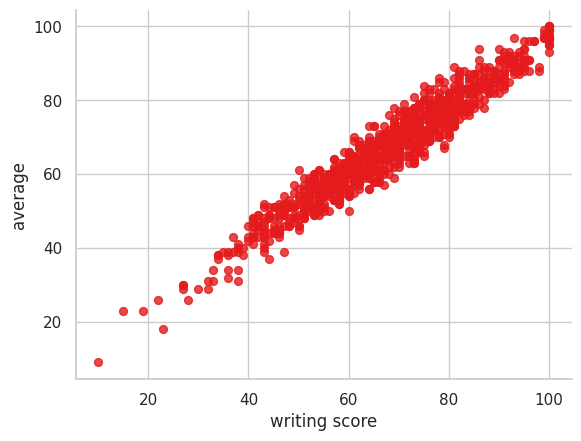

In [71]:
temp_df.plot(kind='scatter', x='writing score', y='average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

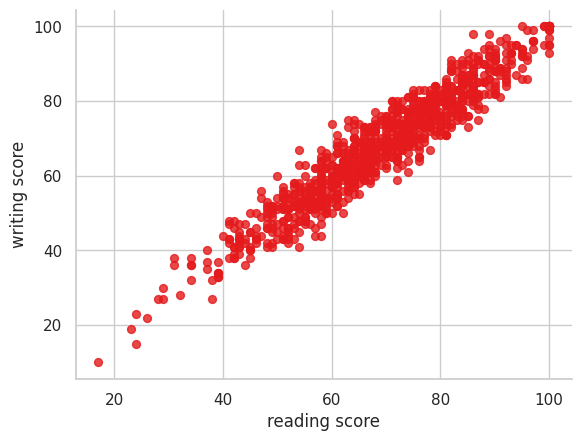

In [72]:
temp_df.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

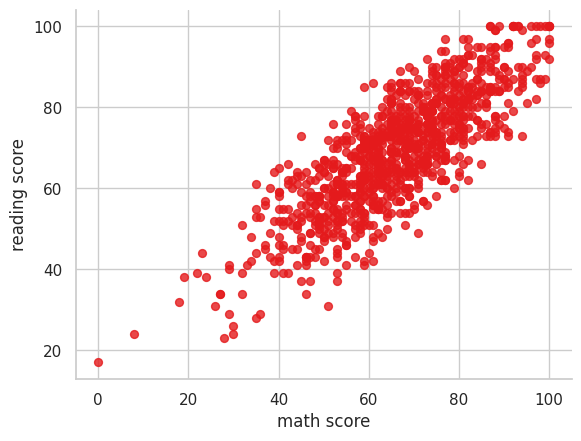

In [73]:
temp_df.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

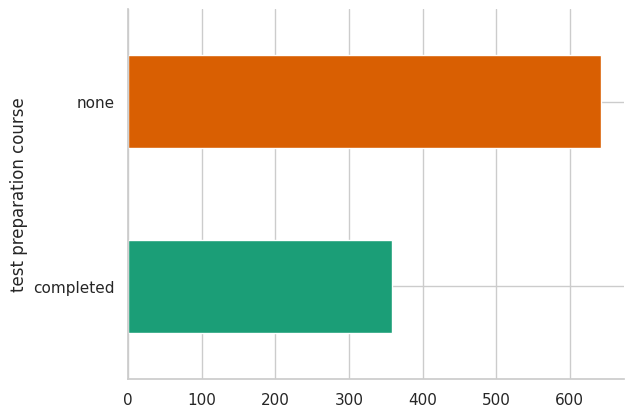

In [74]:
temp_df.groupby('test preparation course').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

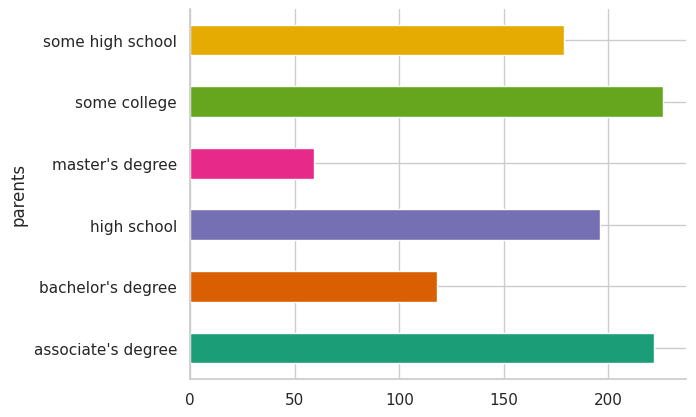

In [75]:
temp_df.groupby('parents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

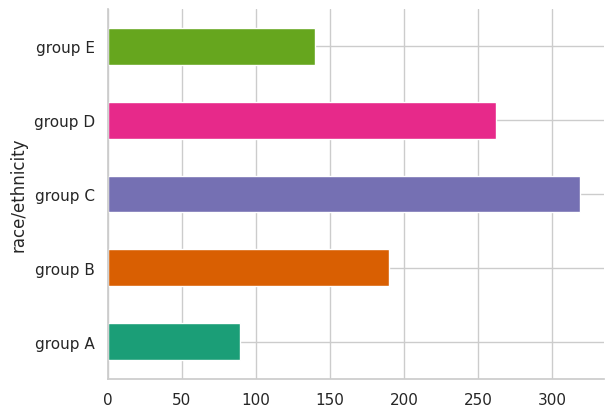

In [76]:
temp_df.groupby('race/ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

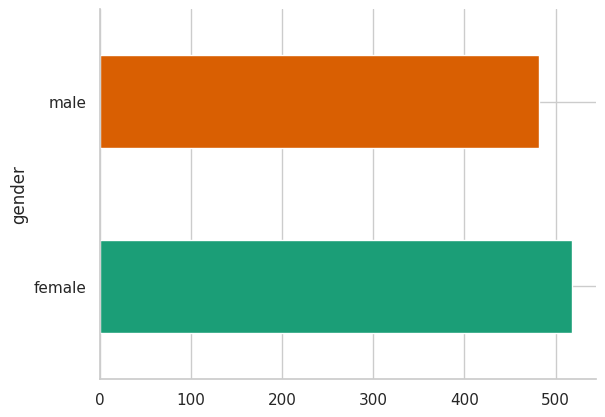

In [77]:
temp_df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

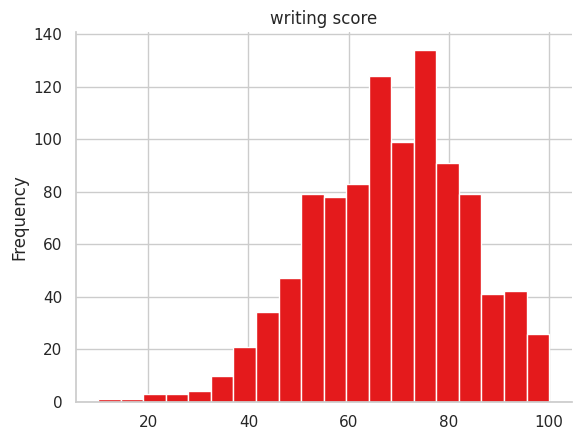

In [78]:
temp_df['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

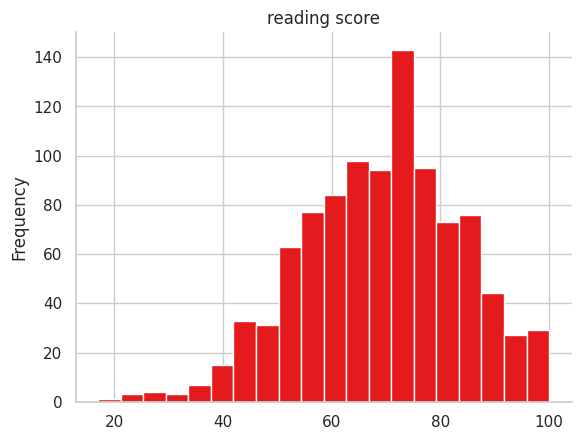

In [79]:
temp_df['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

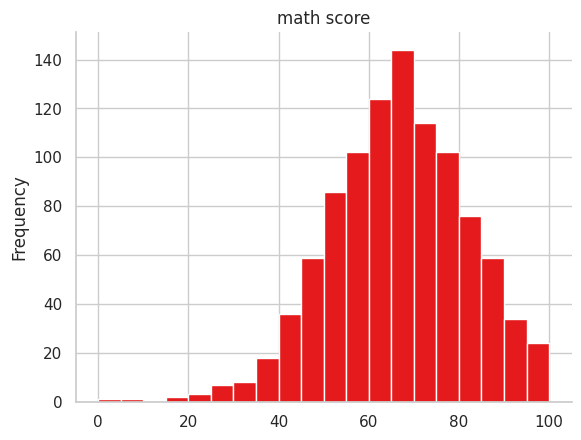

In [80]:
temp_df['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

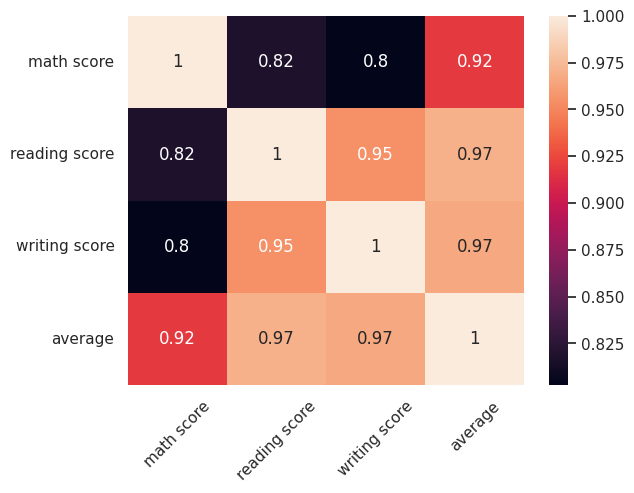

In [81]:
sns.heatmap(temp_df.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

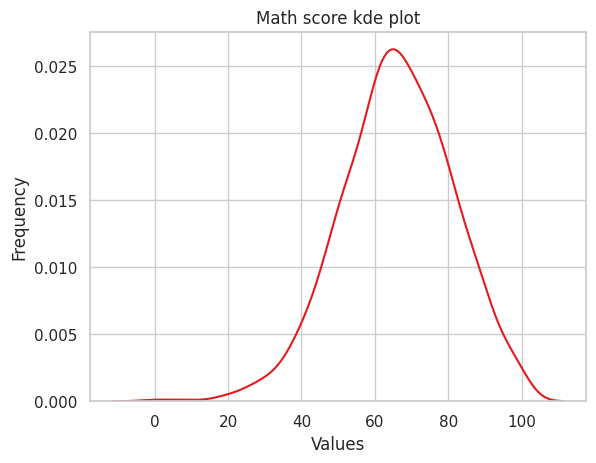

In [82]:
sns.kdeplot(temp_df["math score"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Math score kde plot")
plt.show()

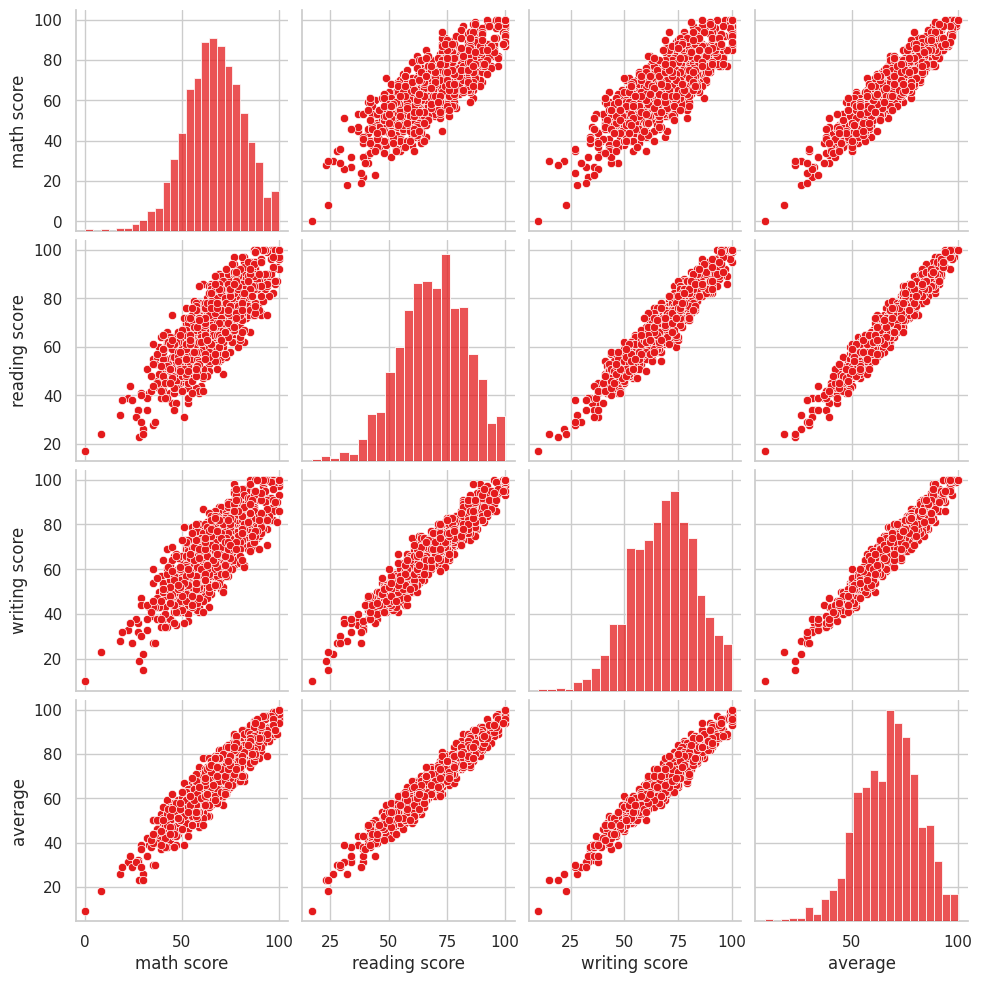

In [83]:
sns.pairplot(temp_df)
plt.show()

In [84]:
race_df = temp_df.groupby(by="race/ethnicity").mean()
race_df

math score  reading score  writing score   average 
race/ethnicity                                                     
group A          61.629213    64.674157      62.674157    62.696629
group B          63.452632    67.352632      65.600000    65.142105
group C          64.463950    69.103448      67.827586    66.789969
group D          67.362595    70.030534      70.145038    68.851145
group E          73.821429    73.028571      71.407143    72.450000

In [85]:
count_df = temp_df["race/ethnicity"].value_counts()
count_df


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<Axes: xlabel='race/ethnicity', ylabel='count'>

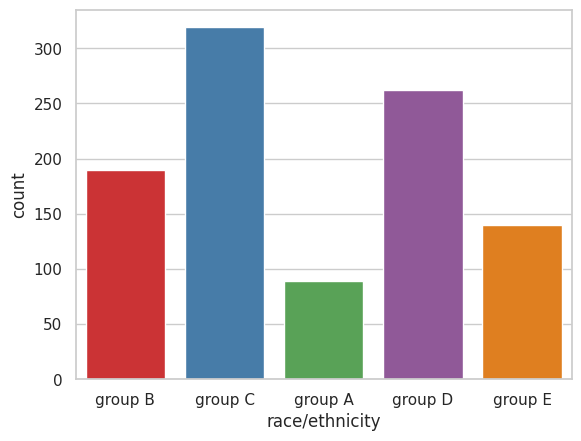

In [86]:
sns.countplot(x= temp_df["race/ethnicity"])

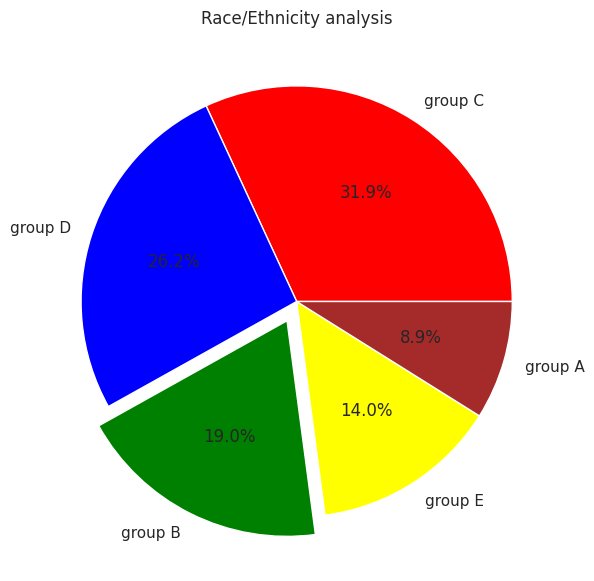

In [87]:
labels = temp_df["race/ethnicity"].value_counts().index
values = temp_df["race/ethnicity"].value_counts().values
colors = ["red","blue","green","yellow","brown"]
explode = [0,0,0.1,0,0]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Race/Ethnicity analysis")
plt.show()

In [88]:
gender_df = temp_df.groupby(by="gender").mean()
gender_df

math score  reading score  writing score   average 
gender                                                     
female   63.633205    72.608108      72.467181    69.239382
male     68.728216    65.473029      63.311203    65.516598

In [89]:
parents_df = temp_df[["parents", "math score", "reading score", "writing score"]].groupby(by="parents").mean()
parents_df.head()

math score  reading score  writing score
parents                                                     
associate's degree   67.882883    70.927928      69.896396  
bachelor's degree    69.389831    73.000000      73.381356  
high school          62.137755    64.704082      62.448980  
master's degree      69.745763    75.372881      75.677966  
some college         67.128319    69.460177      68.840708

In [90]:
preparation_df = temp_df[["test preparation course", "math score", "reading score", "writing score"]].groupby(by="test preparation course").mean()
preparation_df

math score  reading score  writing score
test preparation course                                          
completed                 69.695531    73.893855      74.418994  
none                      64.077882    66.534268      64.504673

In [91]:
temp_df.to_csv("temp_df.csv",index=False)

In [92]:
temp_df

gender race/ethnicity       parents       test preparation course  \
0    female     group B      bachelor's degree              none         
1    female     group C           some college         completed         
2    female     group B        master's degree              none         
3      male     group A     associate's degree              none         
4      male     group C           some college              none         
..      ...            ...                 ...                     ...   
995  female     group E        master's degree         completed         
996    male     group C            high school              none         
997  female     group C            high school         completed         
998  female     group D           some college         completed         
999  female     group D           some college              none         

     math score  reading score  writing score  average  
0        72           72             74          72     
1        69           90             88          82     
2        90           95             93          92     
3        47           57             44          49     
4        76           78             75          76     
..          ...            ...            ...      ...  
995      88           99             95          94     
996      62           55             55          57     
997      59           71             65          65     
998      68           78             77          74     
999      77           86             86          83     

[1000 rows x 8 columns]

Shape of your Data Set loaded: (1000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 dupli

Number of All Scatter Plots = 10


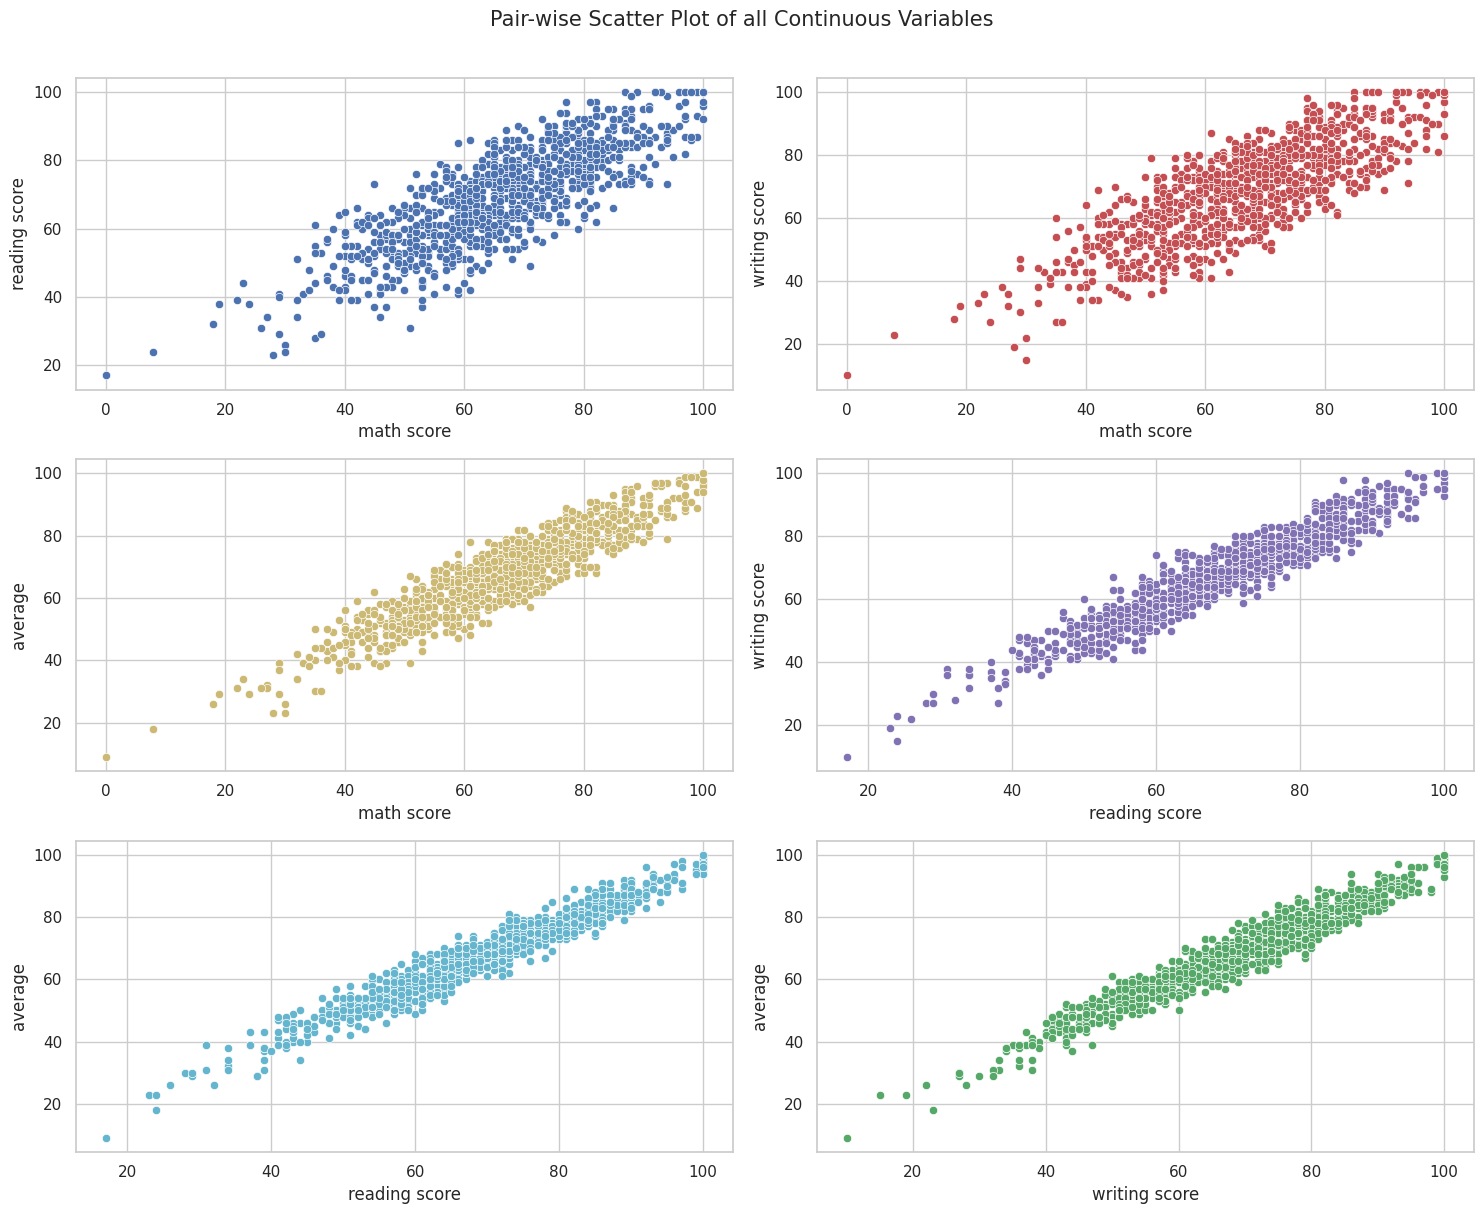

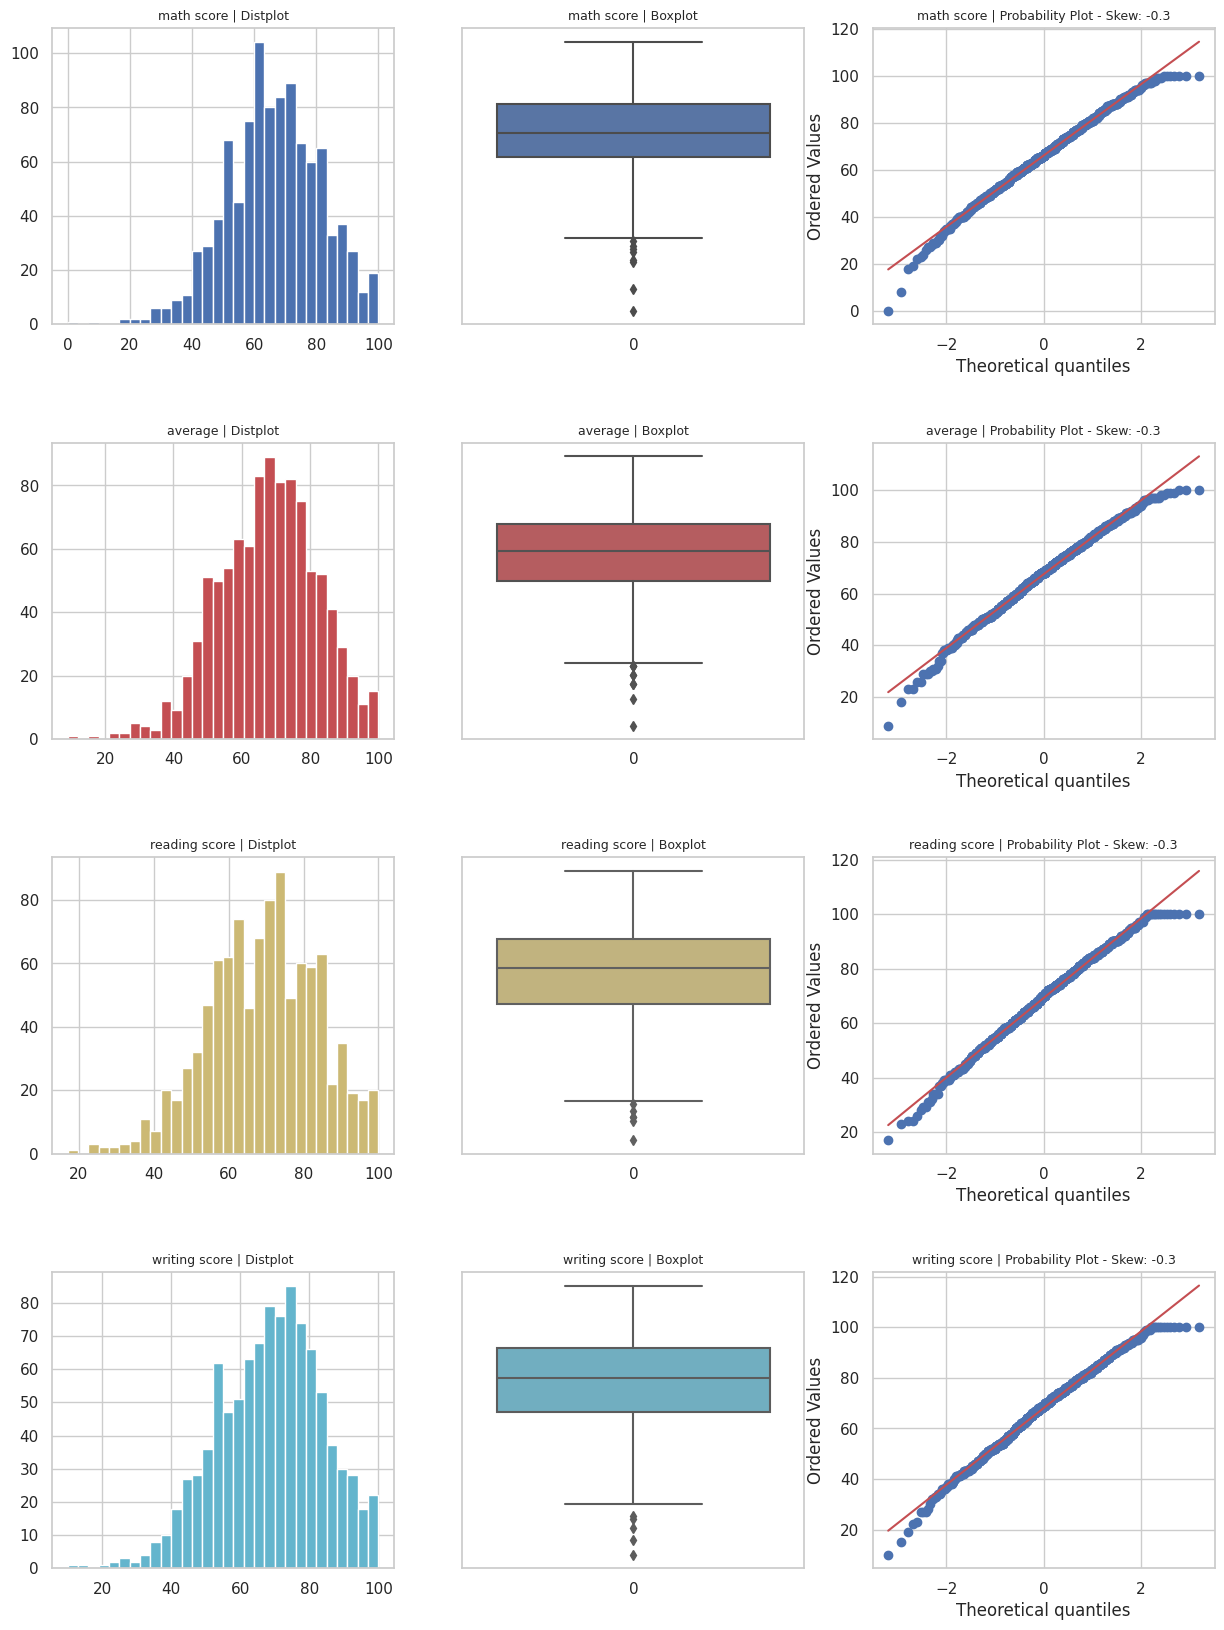

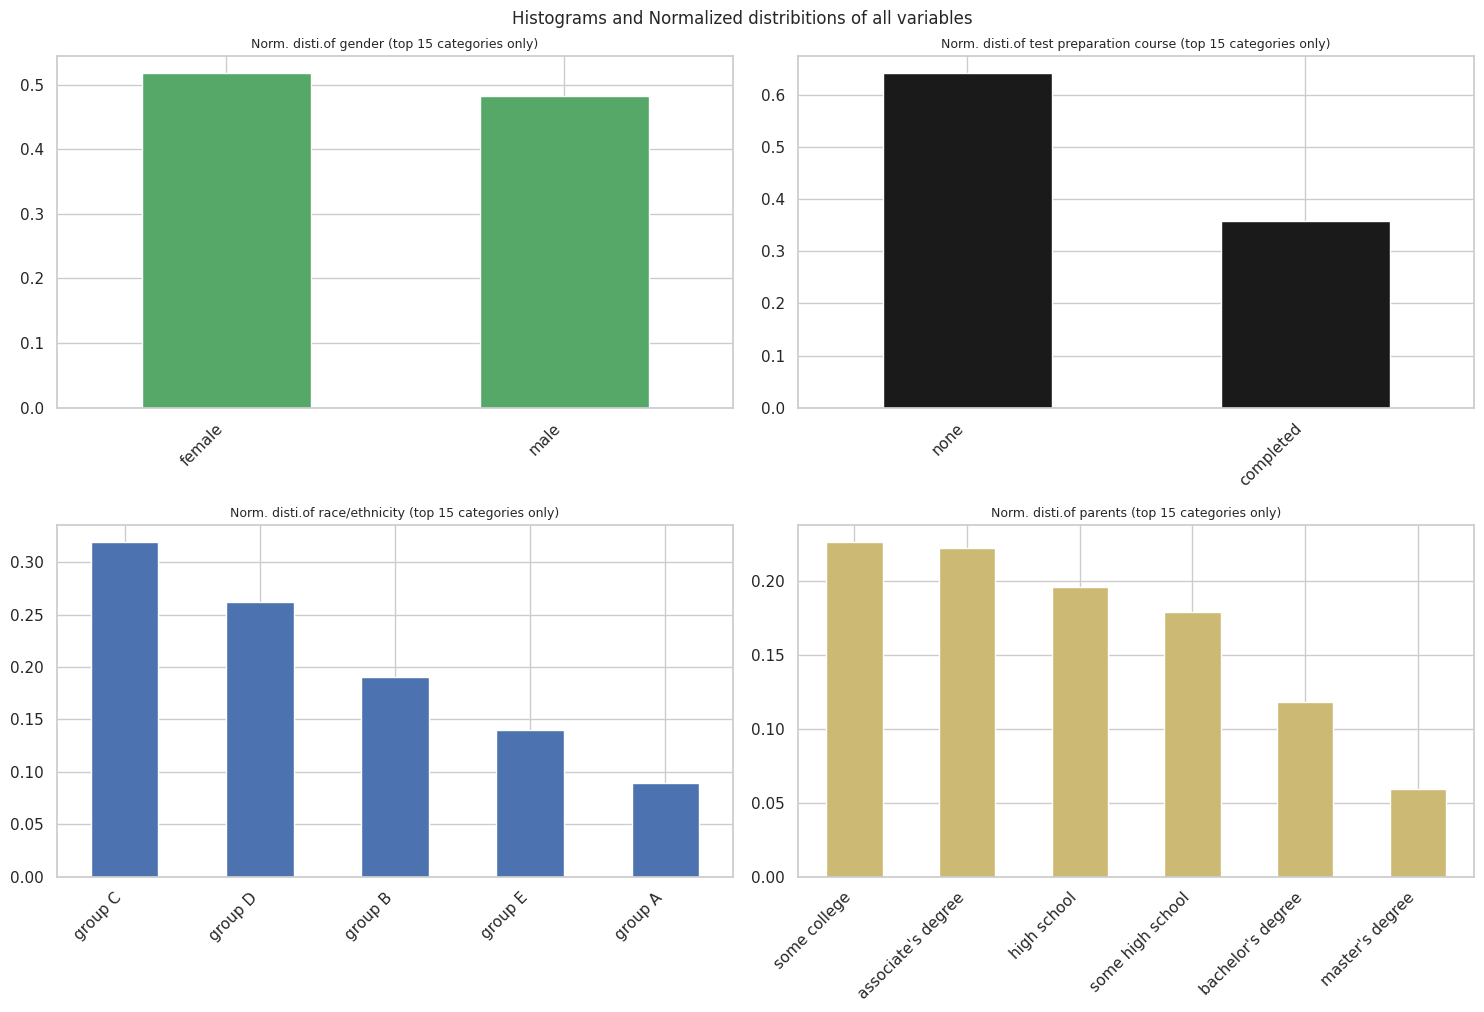

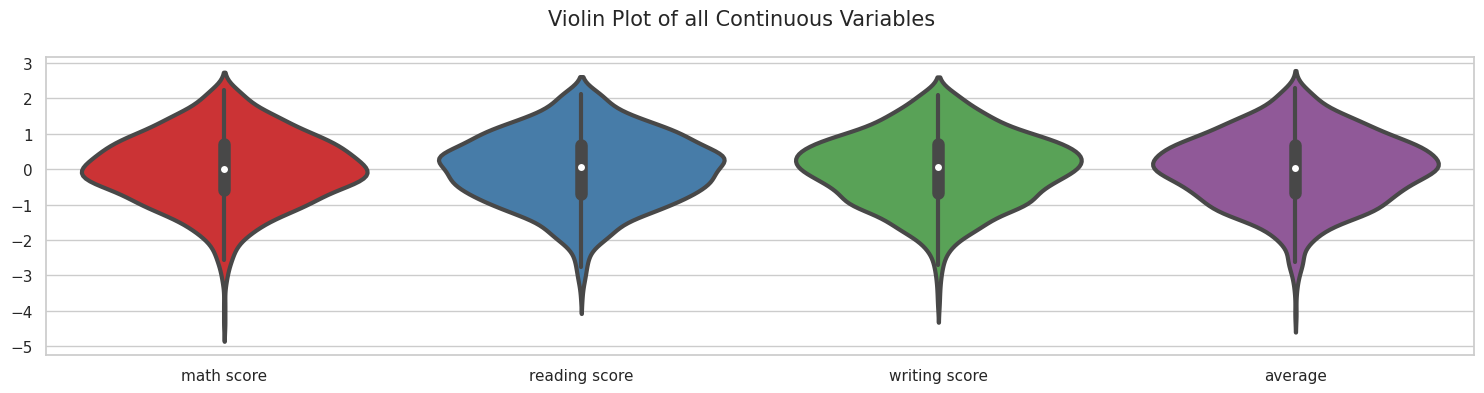

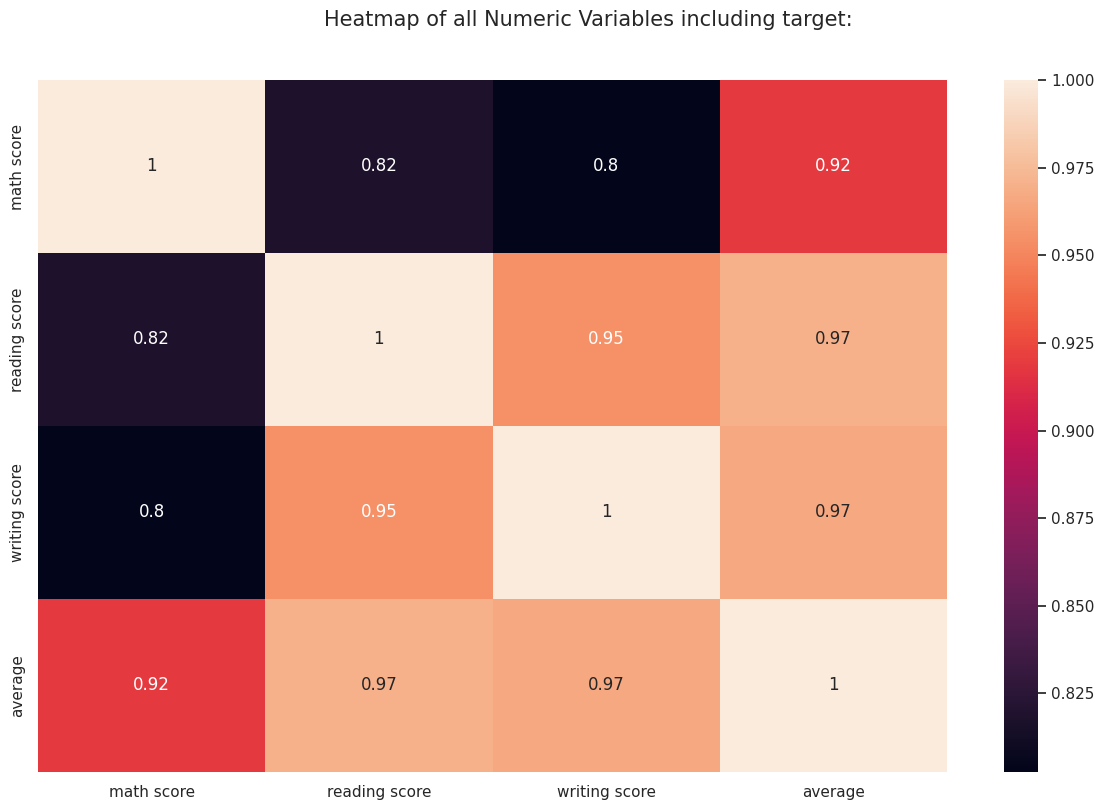

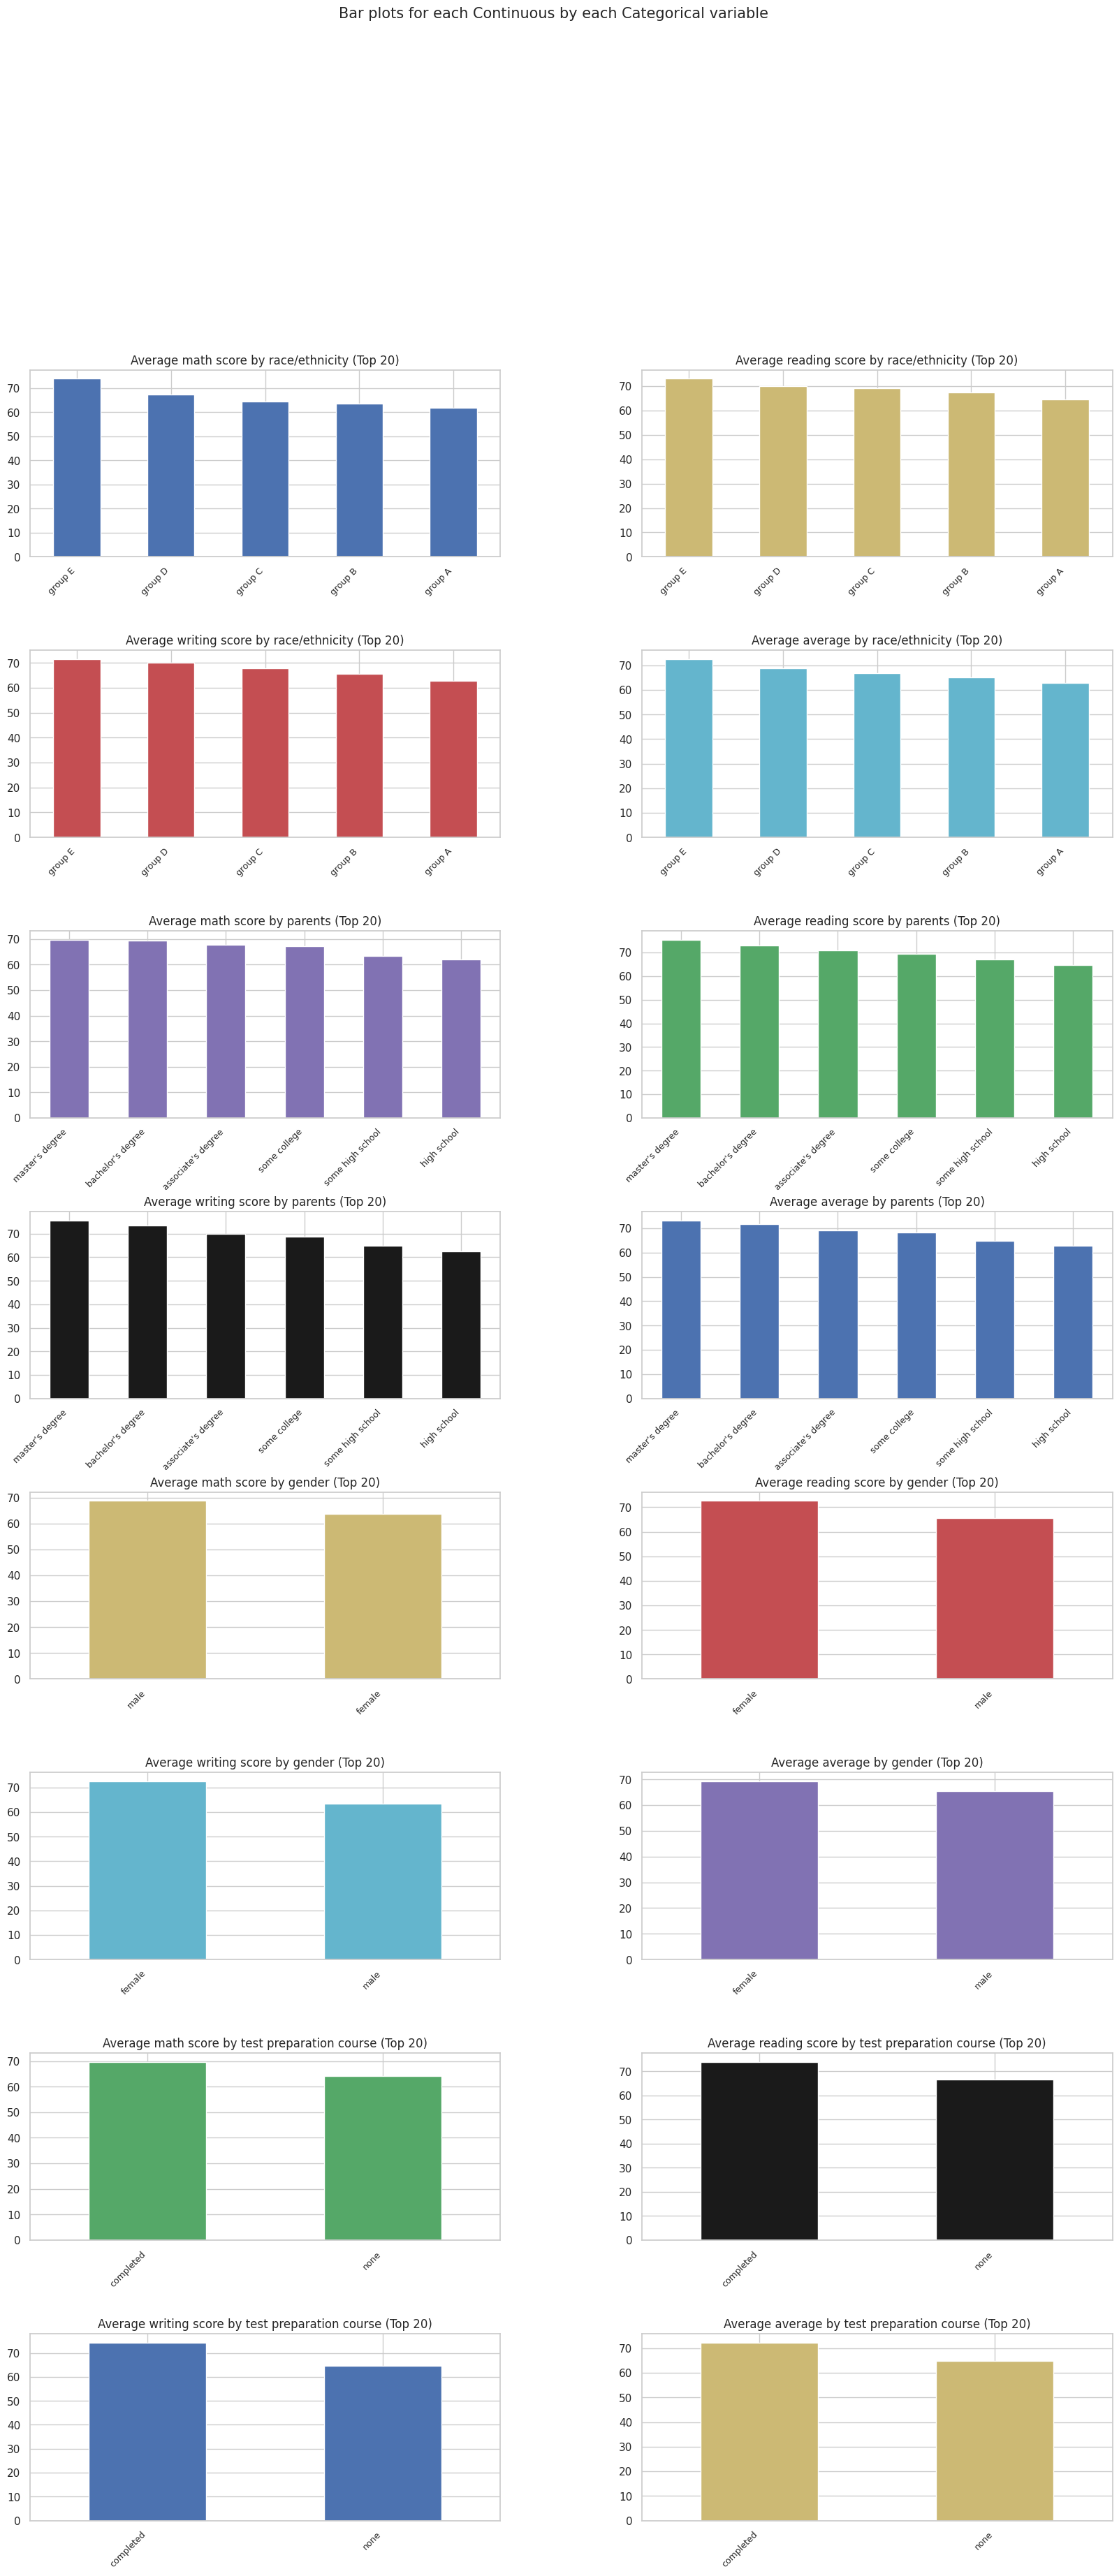

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [93]:
AV = AutoViz_Class()
report = AV.AutoViz('temp_df.csv')

Shape of your Data Set loaded: (1000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
To fix these data quality

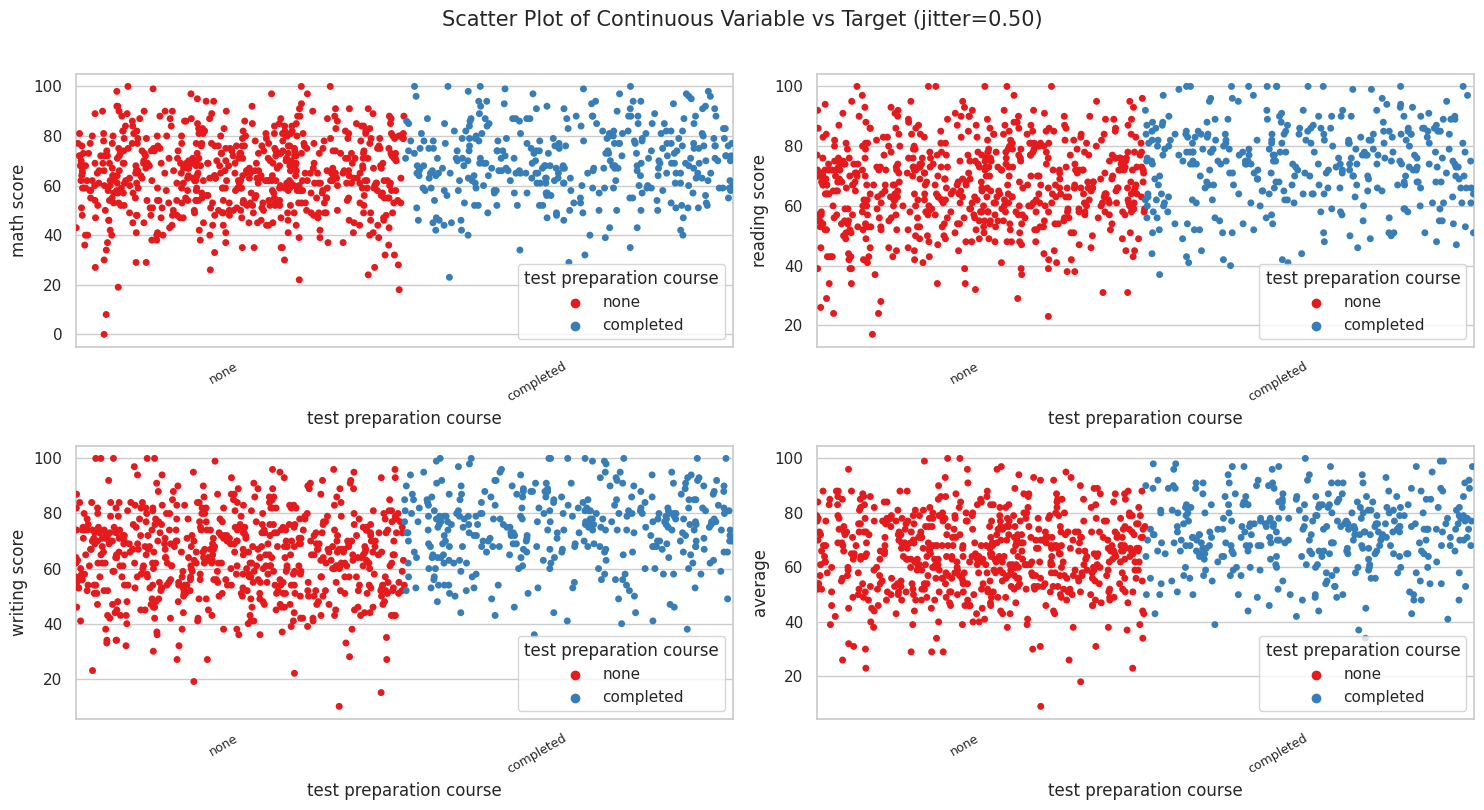

Total Number of Scatter Plots = 10


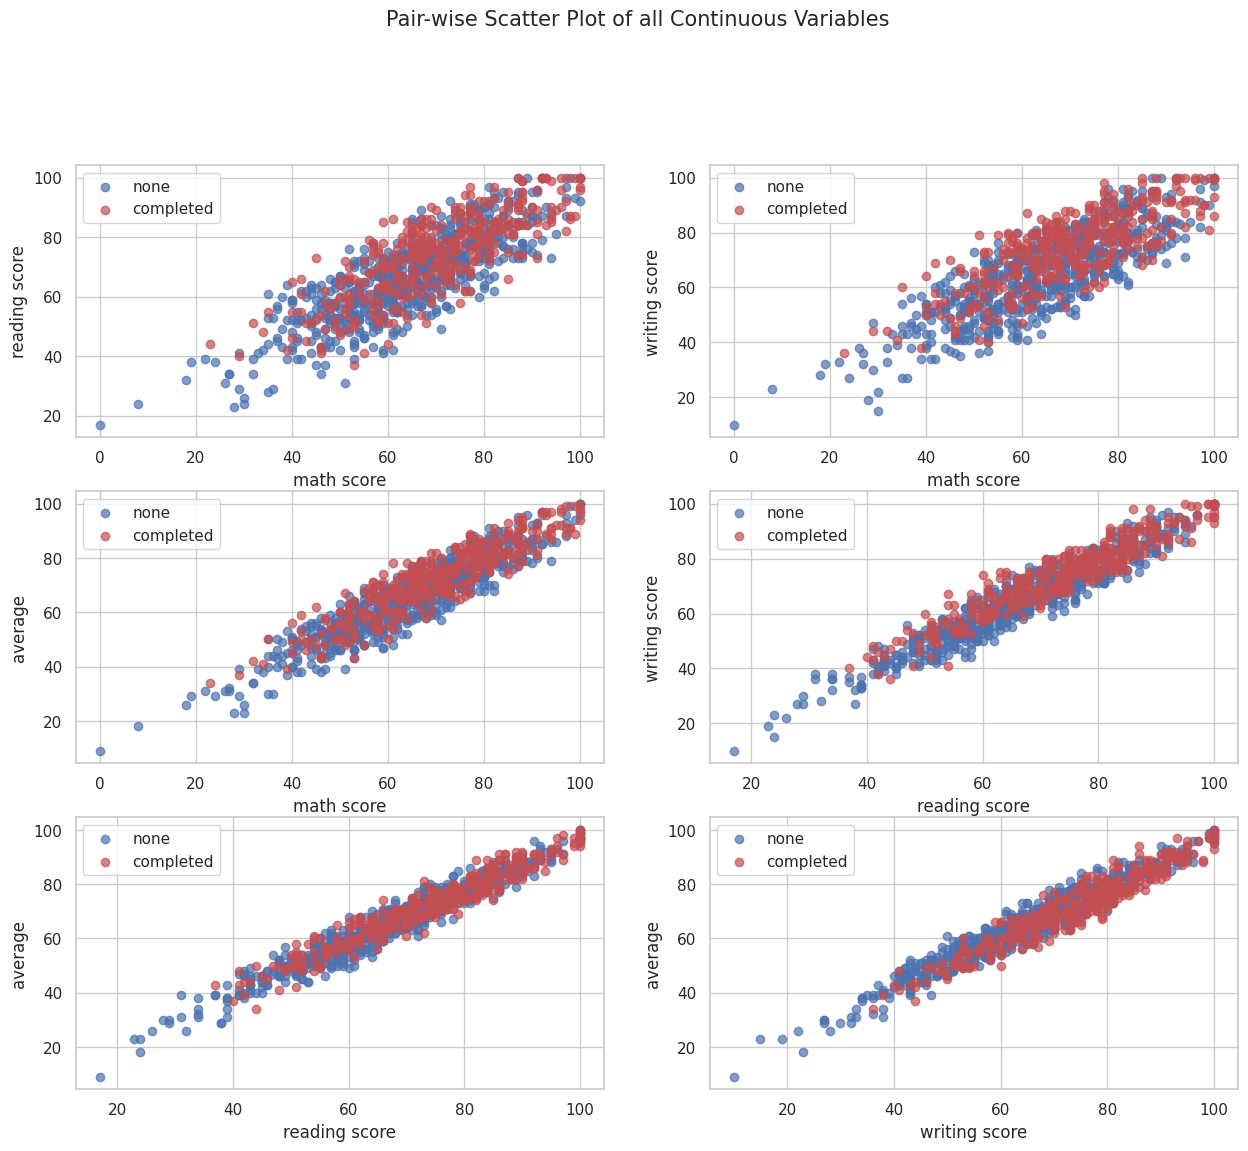

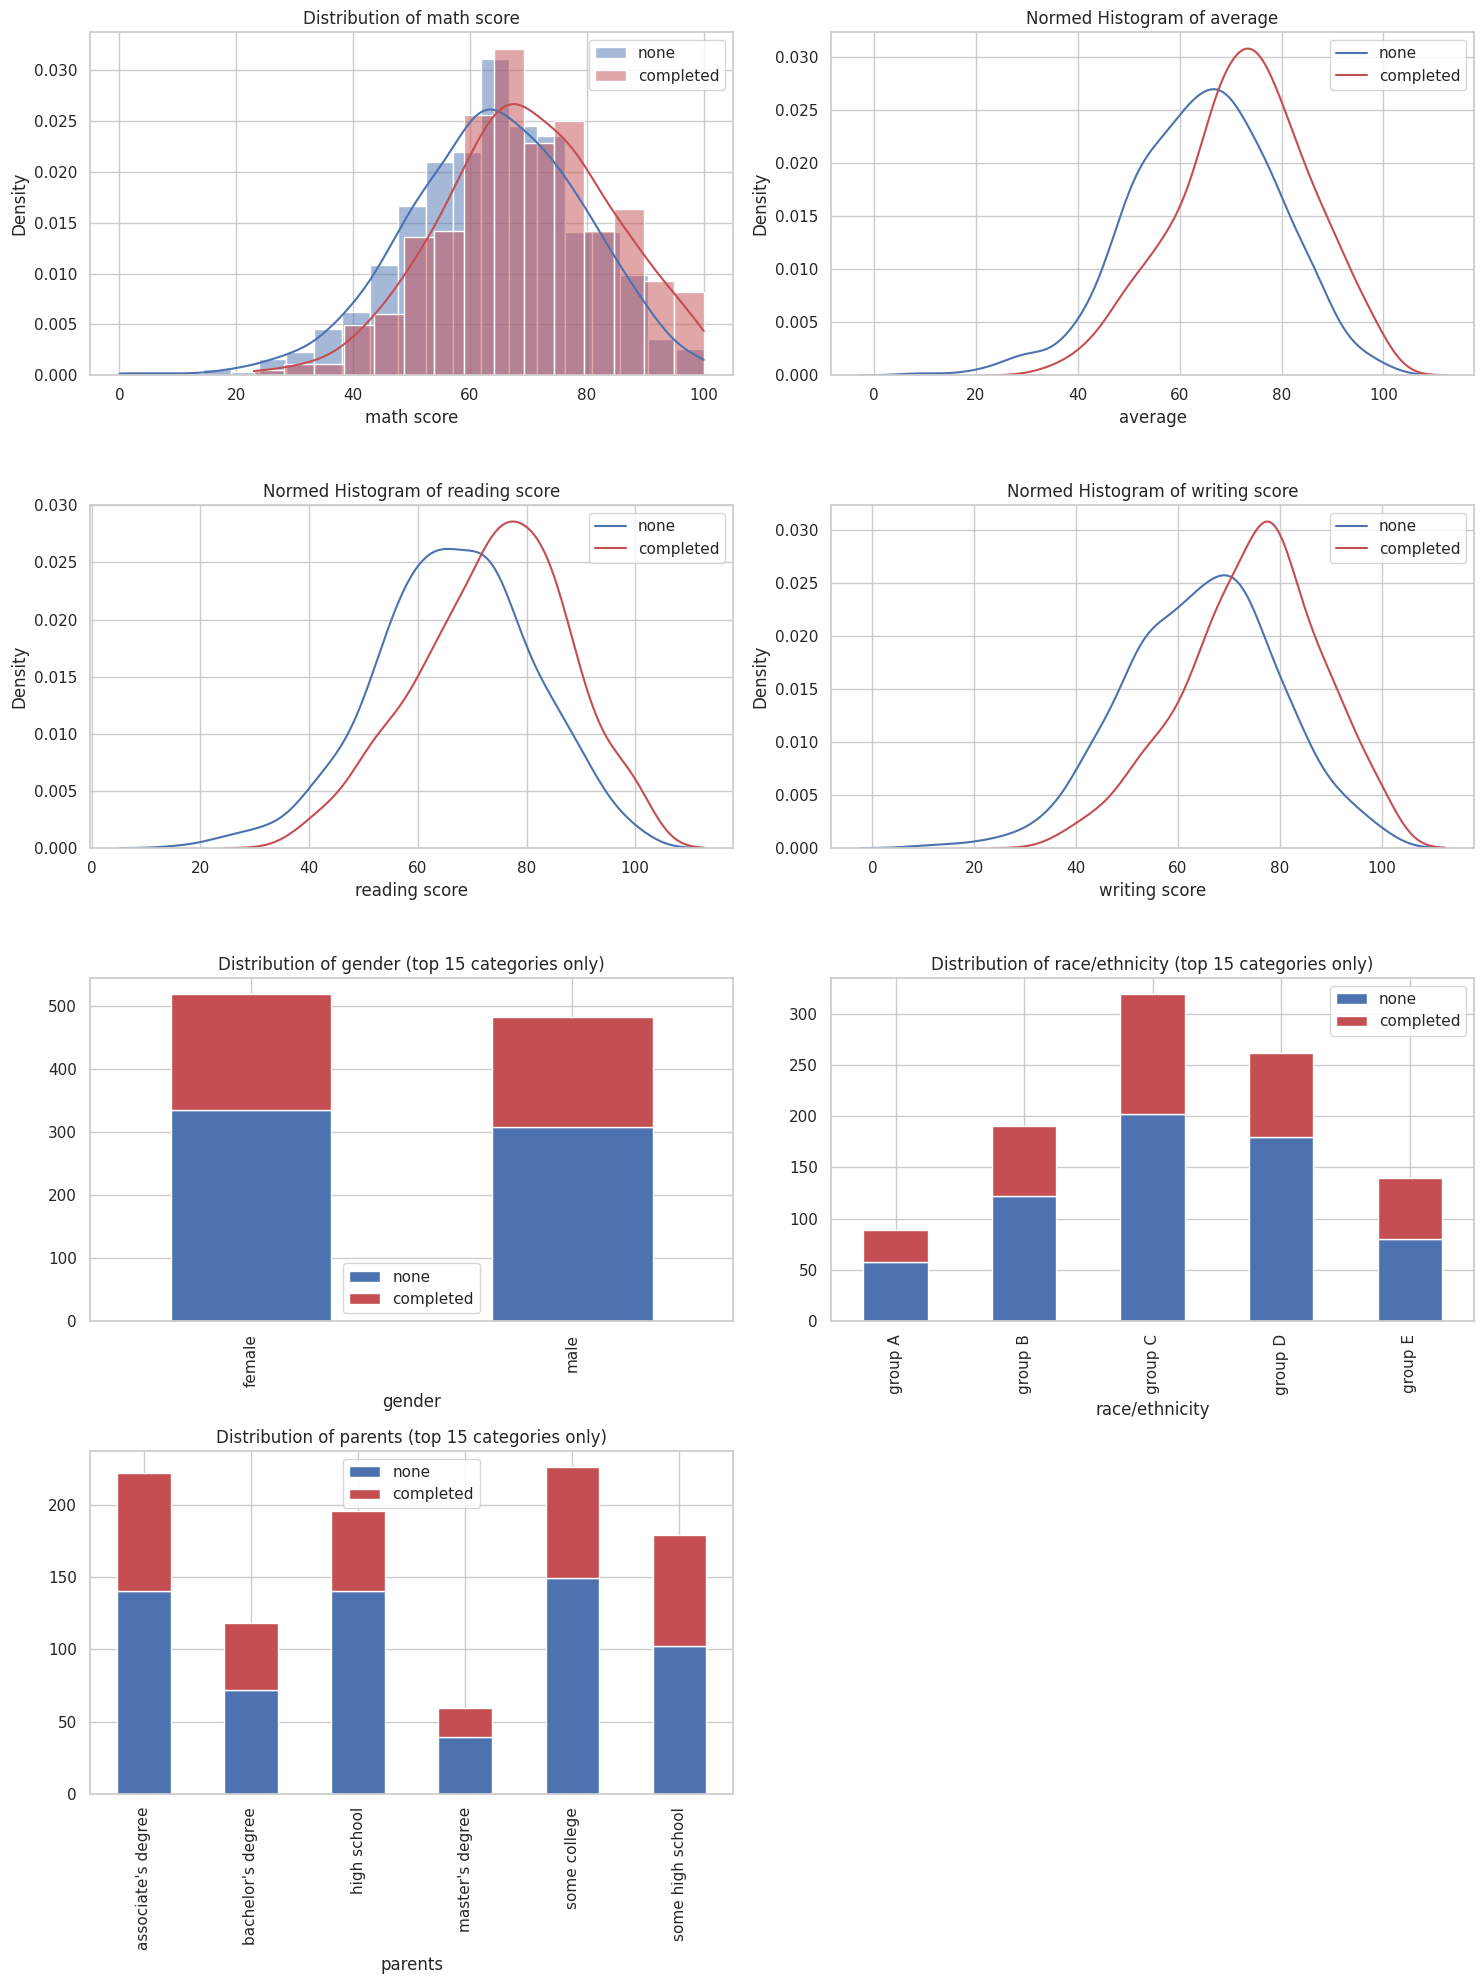

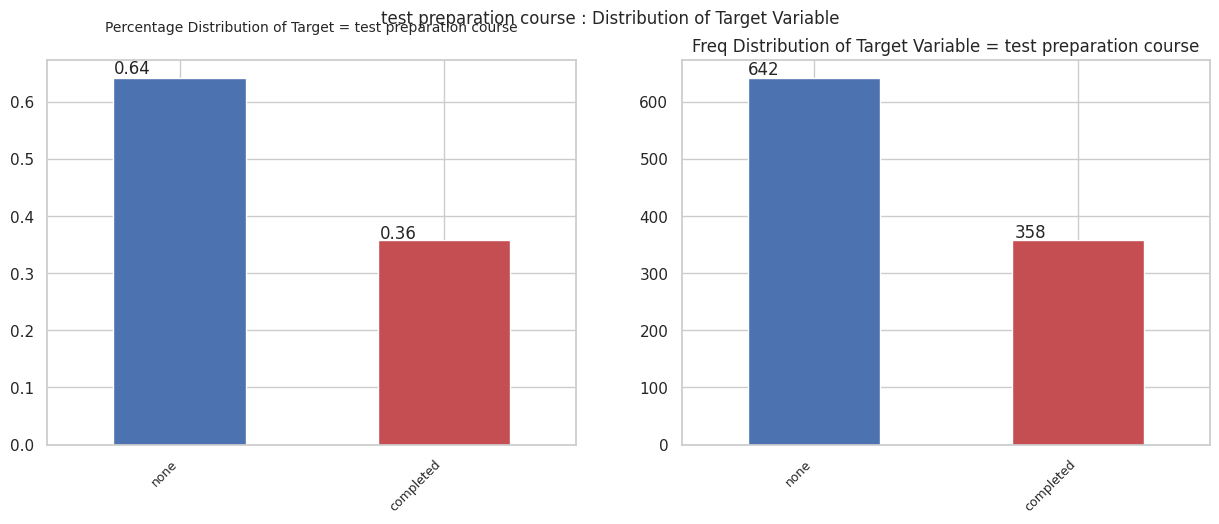

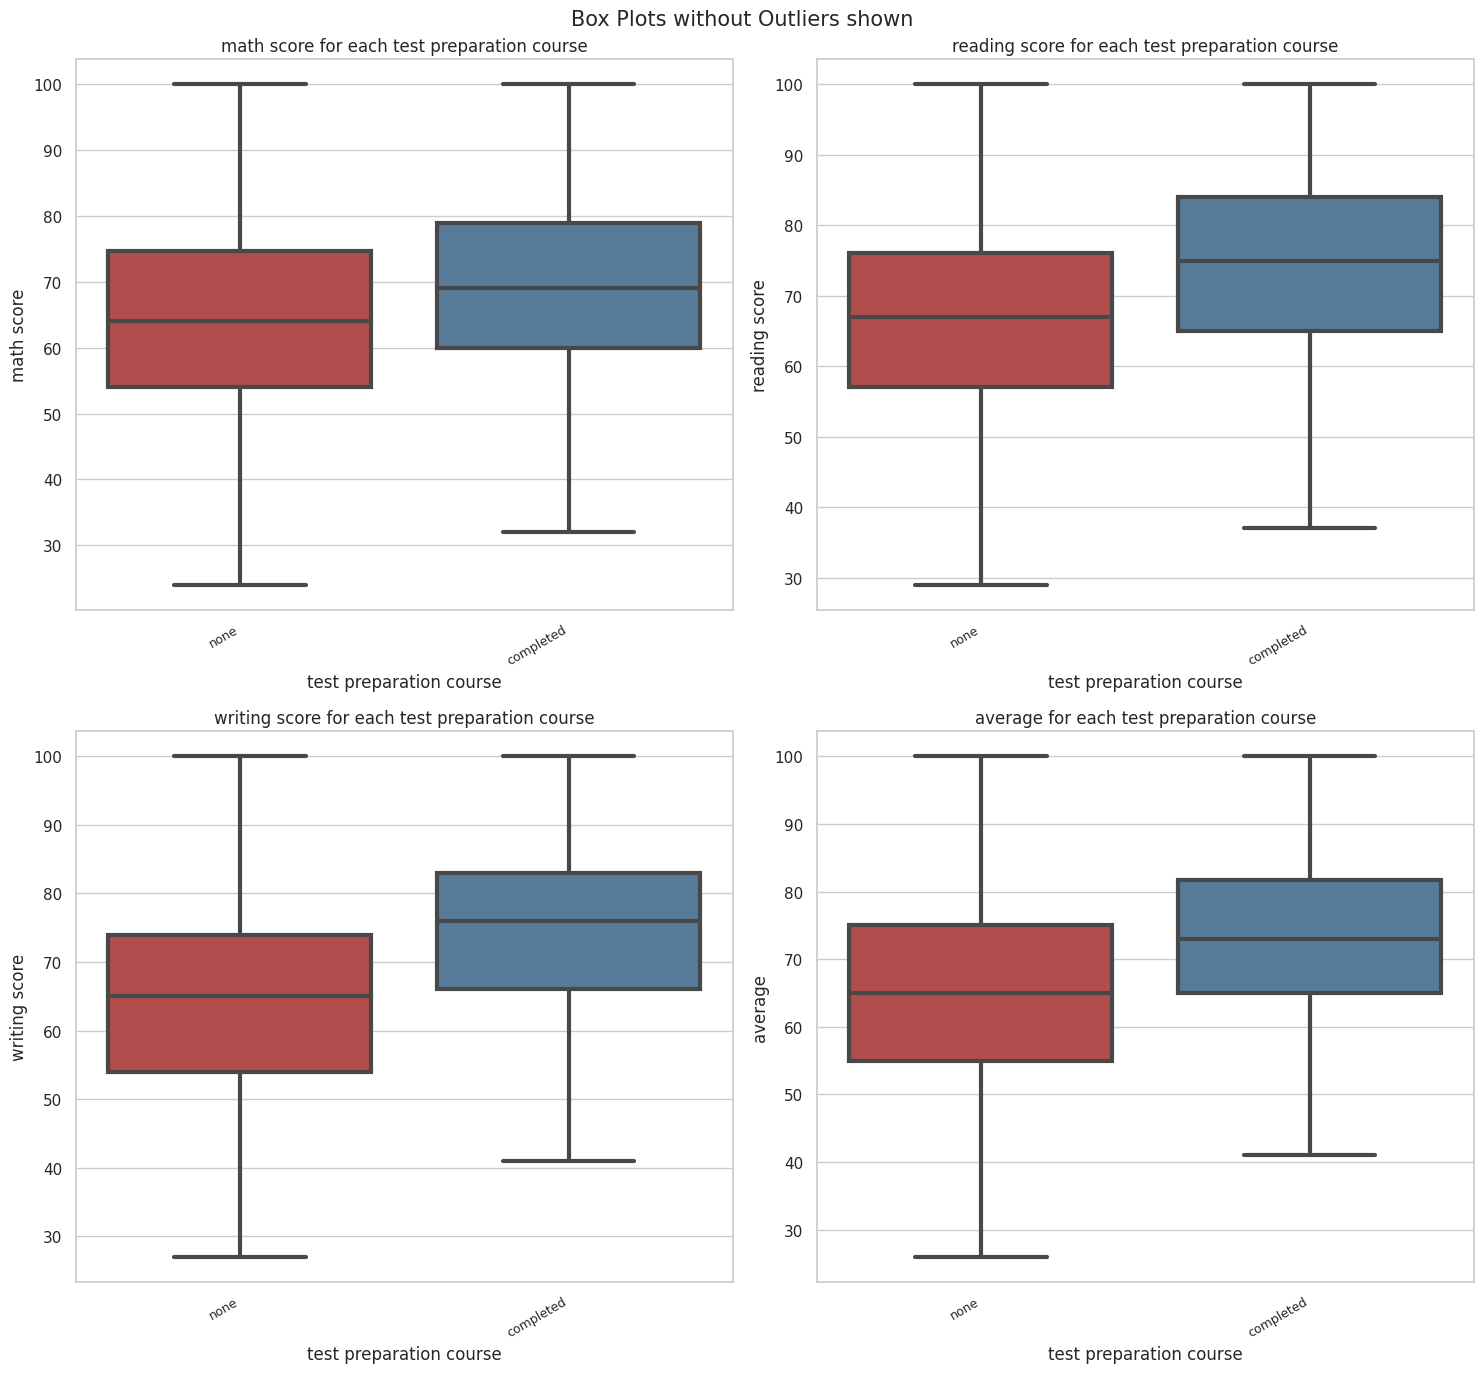

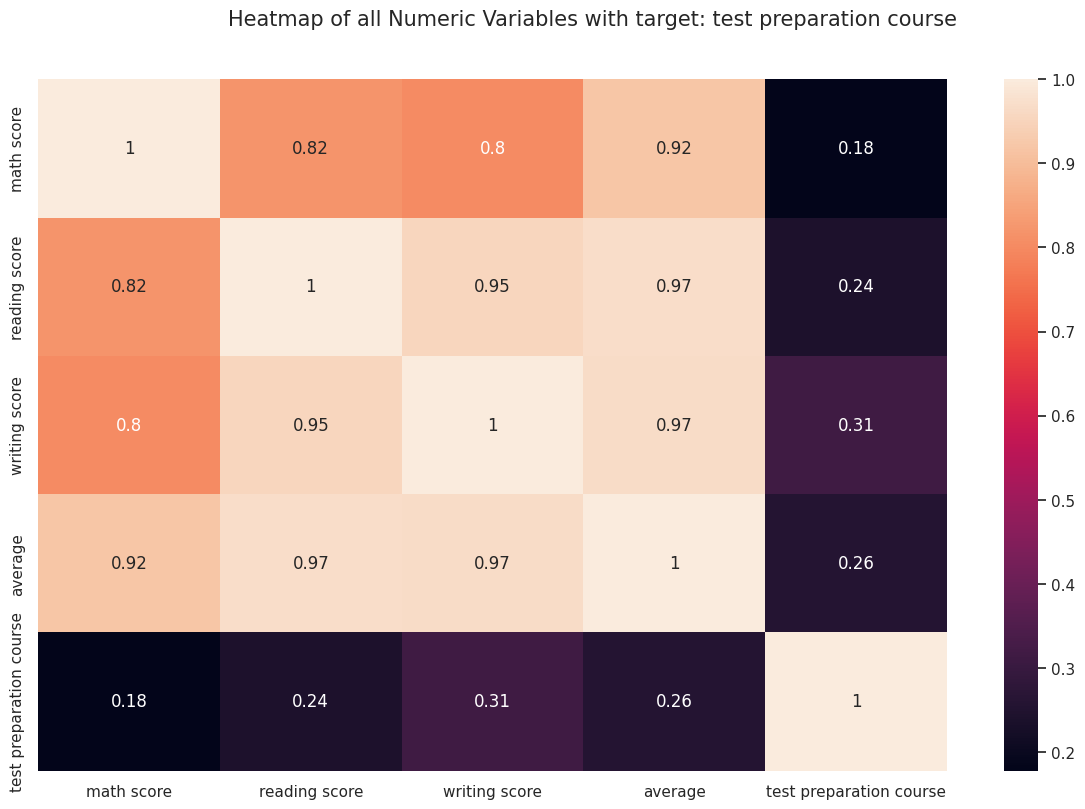

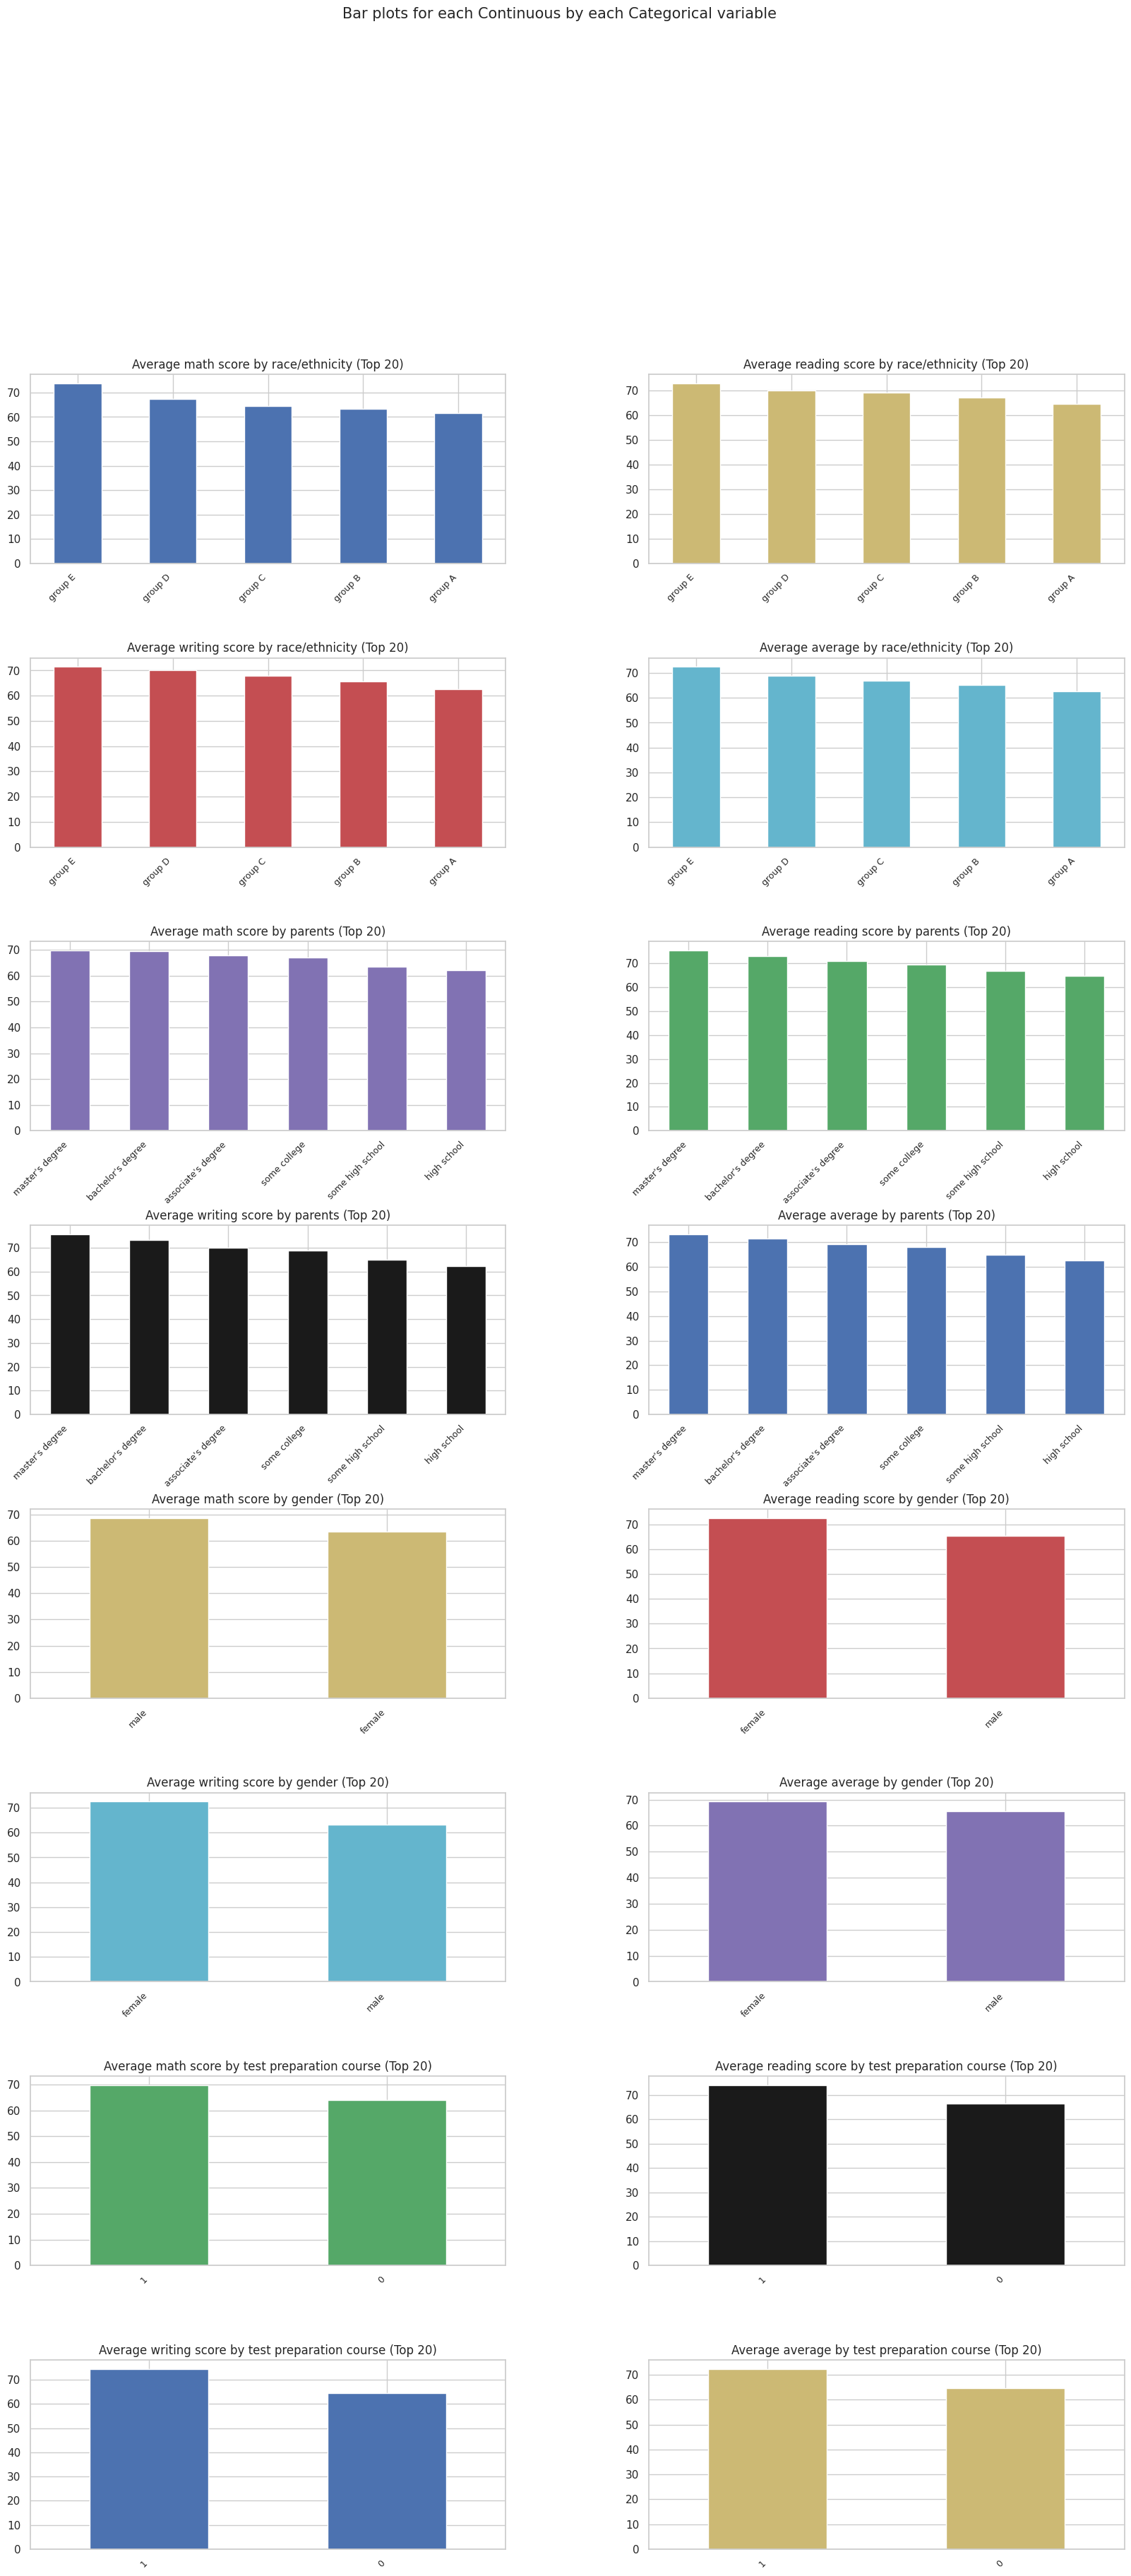

All Plots done
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [94]:
AV = AutoViz_Class()
df_report = AV.AutoViz(
    filename='',
    sep=',',
    depVar='test preparation course',
    dfte=temp_df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='png',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    )


In [95]:
temp_df

gender race/ethnicity       parents       test preparation course  \
0    female     group B      bachelor's degree              none         
1    female     group C           some college         completed         
2    female     group B        master's degree              none         
3      male     group A     associate's degree              none         
4      male     group C           some college              none         
..      ...            ...                 ...                     ...   
995  female     group E        master's degree         completed         
996    male     group C            high school              none         
997  female     group C            high school         completed         
998  female     group D           some college         completed         
999  female     group D           some college              none         

     math score  reading score  writing score  average  
0        72           72             74          72     
1        69           90             88          82     
2        90           95             93          92     
3        47           57             44          49     
4        76           78             75          76     
..          ...            ...            ...      ...  
995      88           99             95          94     
996      62           55             55          57     
997      59           71             65          65     
998      68           78             77          74     
999      77           86             86          83     

[1000 rows x 8 columns]

In [96]:
columns = ['math score', 'reading score','writing score','test preparation course']
need_df = temp_df[columns]
need_df

math score  reading score  writing score test preparation course
0        72           72             74                    none      
1        69           90             88               completed      
2        90           95             93                    none      
3        47           57             44                    none      
4        76           78             75                    none      
..          ...            ...            ...                     ...
995      88           99             95               completed      
996      62           55             55                    none      
997      59           71             65               completed      
998      68           78             77               completed      
999      77           86             86                    none      

[1000 rows x 4 columns]

In [97]:
need_df['test preparation course'].replace({'completed':1,'none':0},inplace=True)

In [98]:
need_df

math score  reading score  writing score  test preparation course
0        72           72             74                   0           
1        69           90             88                   1           
2        90           95             93                   0           
3        47           57             44                   0           
4        76           78             75                   0           
..          ...            ...            ...                      ...
995      88           99             95                   1           
996      62           55             55                   0           
997      59           71             65                   1           
998      68           78             77                   1           
999      77           86             86                   0           

[1000 rows x 4 columns]

In [99]:
X = need_df.drop(['test preparation course'], axis=1)
y = need_df['test preparation course']

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(800, 3) (200, 3) (800,) (200,)


The classification accuracy of Logistic Regression model is 69.5%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

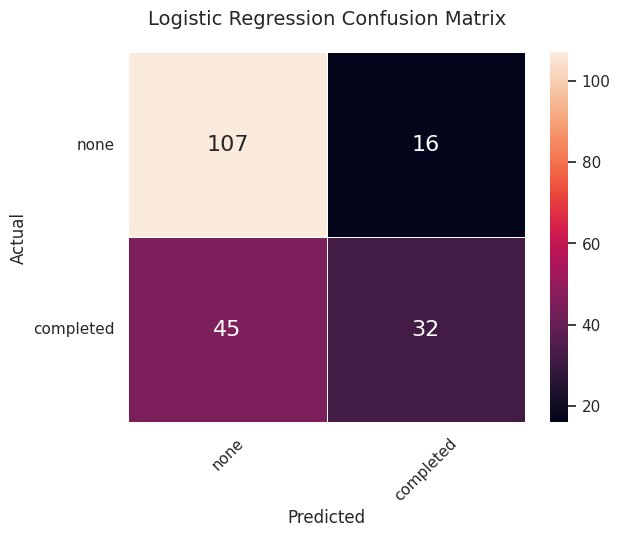

In [101]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

log_reg_model.predict(X_val)

log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [102]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

        none       0.70      0.87      0.78       123
   completed       0.67      0.42      0.51        77

    accuracy                           0.69       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.69      0.69      0.68       200



The classification accuracy of KNN model is 63.5%


Text(0.5, 1.0, 'KNN Confusion Matrix')

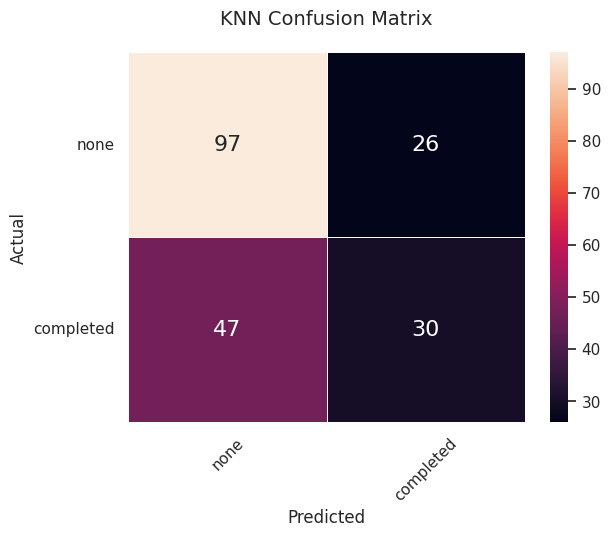

In [103]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_model.predict(X_val)

knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [104]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

        none       0.67      0.79      0.73       123
   completed       0.54      0.39      0.45        77

    accuracy                           0.64       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.62      0.64      0.62       200



The classification accuracy of Decision Tree model is 57.0%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

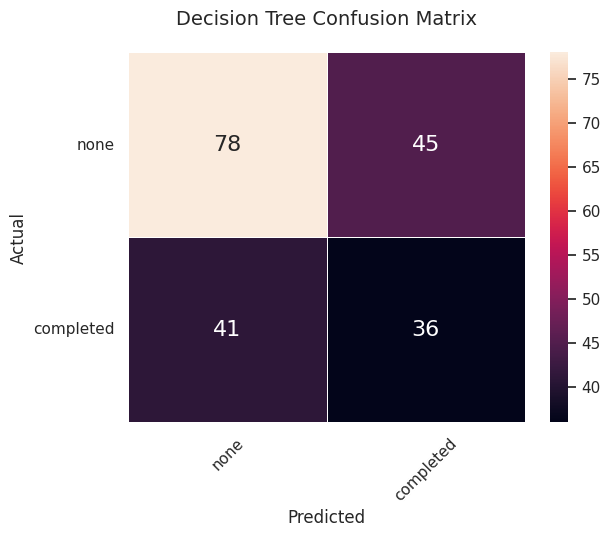

In [105]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

dtree_model.predict(X_val)

dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [106]:
print('Decision Tree Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

        none       0.66      0.63      0.64       123
   completed       0.44      0.47      0.46        77

    accuracy                           0.57       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.57      0.57      0.57       200



The classification accuracy of AdaBoost model is 67.0%


Text(0.5, 1.0, 'AdaBoost Confusion Matrix')

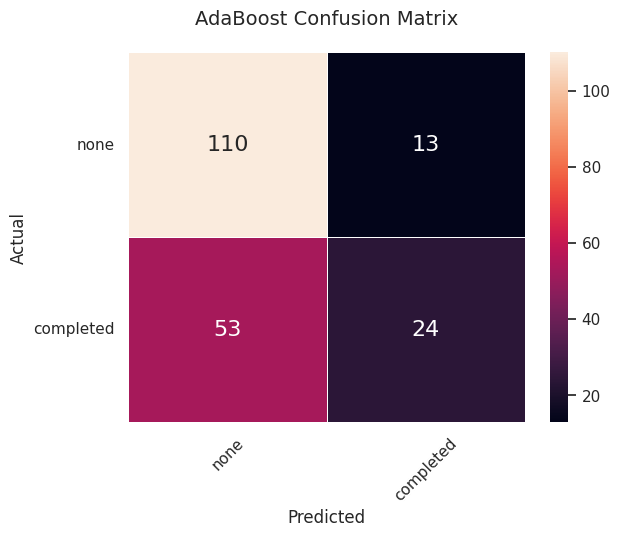

In [107]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

adaboost_model.predict(X_val)

adaboost_model_score = adaboost_model.score(X_val, y_val)
adaboost_model_accuracy = round(adaboost_model_score*100, 2)
print("The classification accuracy of AdaBoost model is "+ str(adaboost_model_accuracy)+"%")

y_pred = adaboost_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('AdaBoost Confusion Matrix', fontsize=14, pad=20)

In [108]:
print('AdaBoost Classification Report')
print('==============================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

AdaBoost Classification Report

              precision    recall  f1-score   support

        none       0.67      0.89      0.77       123
   completed       0.65      0.31      0.42        77

    accuracy                           0.67       200
   macro avg       0.66      0.60      0.60       200
weighted avg       0.66      0.67      0.64       200



The classification accuracy of Random Forest model is 61.0%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

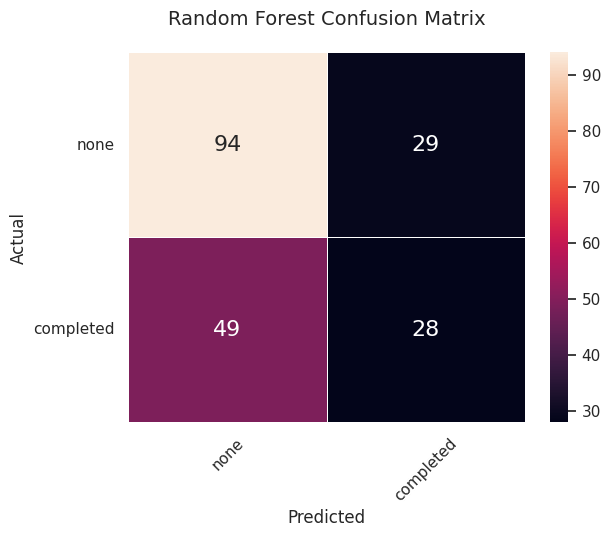

In [109]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

rforest_model.predict(X_val)

rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [110]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

        none       0.66      0.76      0.71       123
   completed       0.49      0.36      0.42        77

    accuracy                           0.61       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.59      0.61      0.60       200



In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV

In [112]:
Seq_model = keras.Sequential()
Seq_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
Seq_model.add(Dense(128, activation='relu'))
Seq_model.add(Dense(64, activation='relu'))
Seq_model.add(Dense(32, activation='relu'))
Seq_model.add(Dense(8, activation='relu'))
Seq_model.add(Dense(1, activation='sigmoid'))

Seq_model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])
Seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 27633 (107.94 KB)
Trainable params: 2763

In [113]:
hist = Seq_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=100)

Seq_model_score = Seq_model.evaluate(X_val, y_val)
Seq_model_accuracy = round(Seq_model_score[1]*100, 2)
print("The classification accuracy of Sequential model is "+ str(Seq_model_accuracy)+"%")

Epoch 1/10
8/8 [==============================] - 1s 37ms/step - loss: 0.8340 - accuracy: 0.5838 - val_loss: 0.6686 - val_accuracy: 0.6150
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6607 - accuracy: 0.6212 - val_loss: 0.6852 - val_accuracy: 0.6150
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.6525 - val_loss: 0.6490 - val_accuracy: 0.6200
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6359 - accuracy: 0.6513 - val_loss: 0.6571 - val_accuracy: 0.6200
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6390 - accuracy: 0.6475 - val_loss: 0.6900 - val_accuracy: 0.6200
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6258 - accuracy: 0.6562 - val_loss: 0.6313 - val_accuracy: 0.6300
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.6562 - val_loss: 0.6287 - val_accuracy: 0.6350
Epoch 8/10
8/8 [================

In [114]:
accuracy_dict = {'Logistic Regrssion' : log_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'AdaBoost' : adaboost_model_accuracy,
                 'Random Forest' : rforest_model_accuracy,
                 'Deep Sequential' : Seq_model_accuracy}
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 69.5 %
K-Nearest Neighbors = 63.5 %
Decision Tree = 57.0 %
AdaBoost = 67.0 %
Random Forest = 61.0 %
Deep Sequential = 61.5 %


In [115]:
n_estimators = [50, 75, 100]
max_depth = [10, 15, 20]
criterion = ['gini', 'entropy']
bootstrap = [True,False]
random_state = [10, 20]
max_features = ['auto', 'sqrt']
min_samples_split = [1, 2, 3]
min_samples_leaf = [1, 2, 3]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              criterion = criterion, bootstrap = bootstrap,
              random_state = random_state, max_features = max_features,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

randF = GridSearchCV(rforest_model, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = randF.fit(X_train, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


In [116]:
print("Results from Random Search ::" )
print("\nThe best estimator across ALL searched params:\n", randF.best_estimator_)
print("\nThe best parameters across ALL searched params:\n", randF.best_params_)

Results from Random Search ::

The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=3, random_state=20)

The best parameters across ALL searched params:
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 20}


The classification accuracy of Random Forest model is 66.5%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

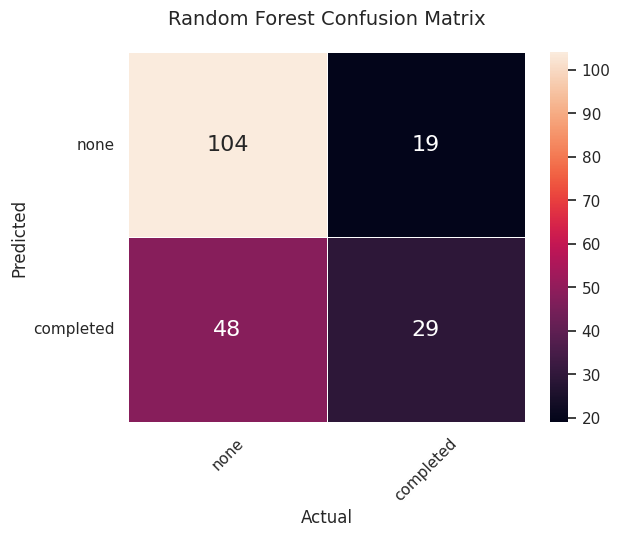

In [117]:
rforest_model = RandomForestClassifier(**randF.best_params_)
rforest_model.fit(X_train, y_train)

rforest_model.predict(X_val)

rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['none', 'completed']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [118]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

        none       0.68      0.85      0.76       123
   completed       0.60      0.38      0.46        77

    accuracy                           0.67       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.65      0.67      0.64       200

